In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load the data from the Excel file
file_path = 'Bird Strikes data.xlsx'
data = pd.read_excel(file_path)

In [19]:
# Display the first few rows of the data
print(data.head())

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                      NaN 2001-07-25   
2                             261        

In [21]:
# Data Cleaning
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                      

In [23]:
# Dropping rows with missing values (if any)
cleaned_data = data.dropna()

In [25]:
# Display the first few rows of the cleaned data
print("\nCleaned data preview:\n", cleaned_data.head())


Cleaned data preview:
      Record ID Aircraft: Type                           Airport: Name  \
210     208033       Airplane                MINNEAPOLIS-ST PAUL INTL   
222     205109       Airplane  CINCINNATI/NORTHERN KENTUCKY INTL ARPT   
260     209544       Airplane                      METRO OAKLAND INTL   
273     206608       Airplane                            ATLANTA INTL   
339     209838       Airplane                       PHILADELPHIA INTL   

    Altitude bin Aircraft: Make/Model Wildlife: Number struck  \
210    > 1000 ft             SAAB-340                 2 to 10   
222    < 1000 ft         CL-RJ100/200                 2 to 10   
260    > 1000 ft            B-737-400                 2 to 10   
273    < 1000 ft                A-320                 2 to 10   
339    < 1000 ft            B-737-400                 2 to 10   

     Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
210                               3    Precautionary Landing 2000-11-13

In [27]:
print("\nColumn names in cleaned data:\n", cleaned_data.columns)


Column names in cleaned data:
 Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'IncidentYear'],
      dtype='object')


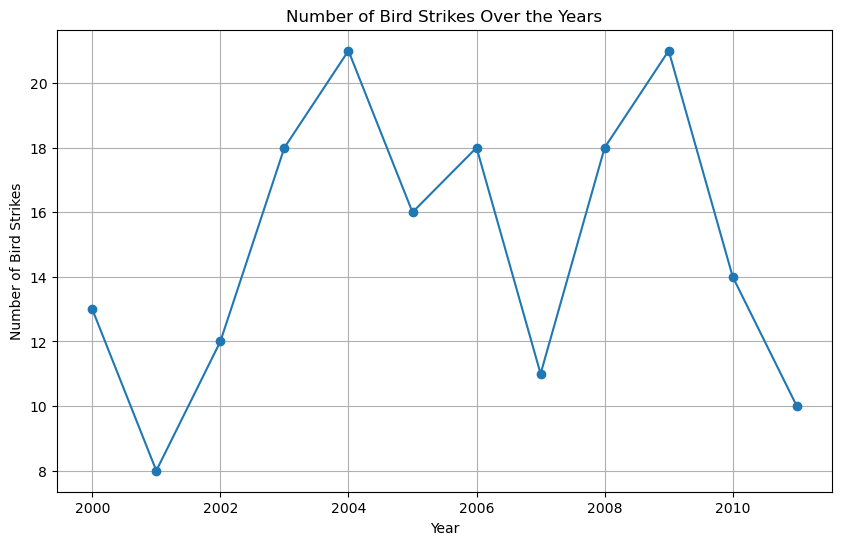

In [31]:

# Exploratory Data Analysis (EDA)
# Visualize the number of bird strikes over the years
yearly_data = cleaned_data['IncidentYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o')
plt.title('Number of Bird Strikes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

In [33]:
# Yearly Analysis of Bird Strikes
yearly_analysis = cleaned_data.groupby('IncidentYear').size()
print("Yearly Analysis of Bird Strikes:\n", yearly_analysis)

Yearly Analysis of Bird Strikes:
 IncidentYear
2000.0    13
2001.0     8
2002.0    12
2003.0    18
2004.0    21
2005.0    16
2006.0    18
2007.0    11
2008.0    18
2009.0    21
2010.0    14
2011.0    10
dtype: int64


In [41]:
# Top 50 Airports with most bird strike incidents
top_airports = cleaned_data['Airport: Name'].value_counts().head(50)
print("Top 50 Airports with most bird strike incidents:\n", top_airports)

Top 50 Airports with most bird strike incidents:
 Airport: Name
SACRAMENTO INTL                           6
PORTLAND INTL (OR)                        5
GREATER PITTSBURGH                        5
CINCINNATI/NORTHERN KENTUCKY INTL ARPT    5
PORTLAND-HILLSBORO ARPT                   4
TETERBORO AIRPORT                         4
CHARLOTTE/DOUGLAS INTL ARPT               4
CHICAGO O'HARE INTL ARPT                  4
MINNEAPOLIS-ST PAUL INTL                  3
LOUISVILLE INTL ARPT                      3
MINETA SAN JOSE INTL                      3
LAGUARDIA NY                              3
MORRISTOWN MUNICIPAL ARPT                 3
KANSAS CITY INTL                          3
BALTIMORE WASH INTL                       3
BURKE LAKEFRONT                           3
HONOLULU INTL ARPT                        3
CHICAGO MIDWAY INTL ARPT                  3
GROTON-NEW LONDON AR                      2
NEW ORLEANS INTL                          2
PETERSBURG JAMES A JOHNSON ARPT           2
DENVER INTL 

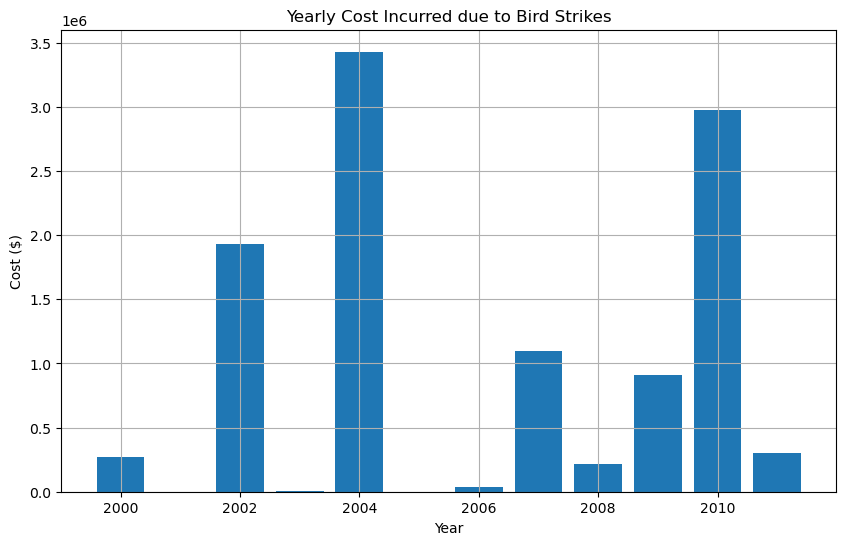

In [45]:
# Yearly Cost Incurred due to Bird Strikes
yearly_cost = cleaned_data.groupby('IncidentYear')['Cost: Total $'].sum()
plt.figure(figsize=(10, 6))
plt.bar(yearly_cost.index, yearly_cost.values)
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.show()

In [61]:
data['IncidentMonth'] = pd.to_datetime(data['FlightDate']).dt.month
data['IncidentDate'] = pd.to_datetime(data['FlightDate']).dt.date
# When do most bird strikes occur? (Time of day, month, season)
# Assuming the dataset has columns for Time and Date
cleaned_data['IncidentMonth'] = pd.to_datetime(cleaned_data['IncidentDate']).dt.month
monthly_strikes = cleaned_data['IncidentMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_strikes.index, monthly_strikes.values)
plt.title('Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

KeyError: 'IncidentDate'

In [49]:
# Altitude and Phase of Flight Analysis
altitude_data = cleaned_data.groupby('Altitude bin').size()
print("Altitude data at the time of bird strikes:\n", altitude_data)

Altitude data at the time of bird strikes:
 Altitude bin
< 1000 ft    164
> 1000 ft     16
dtype: int64


In [51]:
phase_of_flight_data = cleaned_data['When: Phase of flight'].value_counts()
print("Phase of flight at the time of bird strikes:\n", phase_of_flight_data)

Phase of flight at the time of bird strikes:
 When: Phase of flight
Take-off run    85
Climb           57
Approach        24
Landing Roll    12
Parked           2
Name: count, dtype: int64


In [53]:
# Impact of Bird Strikes on Flights
impact_data = cleaned_data['Effect: Impact to flight'].value_counts()
print("Impact of bird strikes on flights:\n", impact_data)

Impact of bird strikes on flights:
 Effect: Impact to flight
Precautionary Landing    78
Aborted Take-off         53
Other                    40
Engine Shut Down          9
Name: count, dtype: int64


In [55]:
# Were Pilots Informed? & Prior Warning and Effect of Strike Relation
pilot_informed_data = cleaned_data['Pilot warned of birds or wildlife?'].value_counts()
print("Were pilots informed about bird strikes?\n", pilot_informed_data)

Were pilots informed about bird strikes?
 Pilot warned of birds or wildlife?
N    101
Y     79
Name: count, dtype: int64
